In [304]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Make request to the API to get 2021 qualifying results

In [285]:
q_2021 = requests.get(
    "http://ergast.com/api/f1/2021/qualifying.json?limit=1000").json()
# q_2020 = requests.get("http://ergast.com/api/f1/2020/qualifying.json?limit=1000").json()
# q_2019 = requests.get("http://ergast.com/api/f1/2019/qualifying.json?limit=1000").json()
# q_2018 = requests.get("http://ergast.com/api/f1/2018/qualifying.json?limit=1000").json()
# q_2017 = requests.get("http://ergast.com/api/f1/2017/qualifying.json?limit=1000").json()
# q_2016 = requests.get("http://ergast.com/api/f1/2016/qualifying.json?limit=1000").json()
# q_2015 = requests.get("http://ergast.com/api/f1/2015/qualifying.json?limit=1000").json()

### Check out the number of entries

In [286]:
n_results = q_2021['MRData']['total']
print(f"{n_results}")

439


### Get all the races for that season and group by round

In [287]:
races = [race for race in q_2021['MRData']['RaceTable']['Races']]


race_names = [race['raceName'] for race in q_2021['MRData']['RaceTable']['Races']]
rounds = [race['round'] for race in races]

race_dict = {rounds[i]:race_names[i]  for i in range(len(race_names))}

print(race_dict)


{'1': 'Bahrain Grand Prix', '2': 'Emilia Romagna Grand Prix', '3': 'Portuguese Grand Prix', '4': 'Spanish Grand Prix', '5': 'Monaco Grand Prix', '6': 'Azerbaijan Grand Prix', '7': 'French Grand Prix', '8': 'Styrian Grand Prix', '9': 'Austrian Grand Prix', '10': 'British Grand Prix', '11': 'Hungarian Grand Prix', '12': 'Belgian Grand Prix', '13': 'Dutch Grand Prix', '14': 'Italian Grand Prix', '15': 'Russian Grand Prix', '16': 'Turkish Grand Prix', '17': 'United States Grand Prix', '18': 'Mexico City Grand Prix', '19': 'São Paulo Grand Prix', '20': 'Qatar Grand Prix', '21': 'Saudi Arabian Grand Prix', '22': 'Abu Dhabi Grand Prix'}





### Get list of qualifying times for each round

In [319]:
#drivers = [result['Driver']['givenName'] + " " + result['Driver']['familyName'] for race in q_2021['MRData']['RaceTable']['Races'] for result in race['QualifyingResults']]
qual_results = [result['Driver']['code'] for race in races for result in race['QualifyingResults']]
# qual_times = [result['Q1'] for race in races for result in race['QualifyingResults']]

qual_times = []
qual_codes = []
q1_times = []
q2_times = []
q3_times = []

for i in range(len(races)):
    for result in race['QualifyingResults']:
        times = []
        qual_codes.append(result['Driver']['code'])
        if 'Q1' in result:
            times.append(result['Q1'])
            q1_times.append(result['Q1'])
        else:
            q1_times.append('0:00.000')
        if 'Q2' in result:
            times.append(result['Q2'])
            q2_times.append(result['Q2'])
        else:
            q2_times.append('0:00.000')
        if 'Q3' in result:
            times.append(result['Q3'])
            q3_times.append(result['Q3'])
        else:
            q3_times.append('0:00.000')
        qual_times.append(times)
print(qual_codes, qual_times) 

['VER', 'HAM', 'NOR', 'PER', 'SAI', 'BOT', 'LEC', 'TSU', 'OCO', 'RIC', 'ALO', 'GAS', 'STR', 'GIO', 'VET', 'LAT', 'RUS', 'RAI', 'MSC', 'MAZ', 'VER', 'HAM', 'NOR', 'PER', 'SAI', 'BOT', 'LEC', 'TSU', 'OCO', 'RIC', 'ALO', 'GAS', 'STR', 'GIO', 'VET', 'LAT', 'RUS', 'RAI', 'MSC', 'MAZ', 'VER', 'HAM', 'NOR', 'PER', 'SAI', 'BOT', 'LEC', 'TSU', 'OCO', 'RIC', 'ALO', 'GAS', 'STR', 'GIO', 'VET', 'LAT', 'RUS', 'RAI', 'MSC', 'MAZ', 'VER', 'HAM', 'NOR', 'PER', 'SAI', 'BOT', 'LEC', 'TSU', 'OCO', 'RIC', 'ALO', 'GAS', 'STR', 'GIO', 'VET', 'LAT', 'RUS', 'RAI', 'MSC', 'MAZ', 'VER', 'HAM', 'NOR', 'PER', 'SAI', 'BOT', 'LEC', 'TSU', 'OCO', 'RIC', 'ALO', 'GAS', 'STR', 'GIO', 'VET', 'LAT', 'RUS', 'RAI', 'MSC', 'MAZ', 'VER', 'HAM', 'NOR', 'PER', 'SAI', 'BOT', 'LEC', 'TSU', 'OCO', 'RIC', 'ALO', 'GAS', 'STR', 'GIO', 'VET', 'LAT', 'RUS', 'RAI', 'MSC', 'MAZ', 'VER', 'HAM', 'NOR', 'PER', 'SAI', 'BOT', 'LEC', 'TSU', 'OCO', 'RIC', 'ALO', 'GAS', 'STR', 'GIO', 'VET', 'LAT', 'RUS', 'RAI', 'MSC', 'MAZ', 'VER', 'HAM', 'NOR'

In [320]:
print(q1_times)
print(q2_times)
print(q3_times)
 

['1:23.322', '1:22.845', '1:23.553', '1:23.350', '1:23.624', '1:23.117', '1:23.467', '1:23.428', '1:23.764', '1:23.829', '1:23.846', '1:23.489', '1:24.061', '1:24.118', '1:24.225', '1:24.338', '1:24.423', '1:24.779', '1:24.906', '1:25.685', '1:23.322', '1:22.845', '1:23.553', '1:23.350', '1:23.624', '1:23.117', '1:23.467', '1:23.428', '1:23.764', '1:23.829', '1:23.846', '1:23.489', '1:24.061', '1:24.118', '1:24.225', '1:24.338', '1:24.423', '1:24.779', '1:24.906', '1:25.685', '1:23.322', '1:22.845', '1:23.553', '1:23.350', '1:23.624', '1:23.117', '1:23.467', '1:23.428', '1:23.764', '1:23.829', '1:23.846', '1:23.489', '1:24.061', '1:24.118', '1:24.225', '1:24.338', '1:24.423', '1:24.779', '1:24.906', '1:25.685', '1:23.322', '1:22.845', '1:23.553', '1:23.350', '1:23.624', '1:23.117', '1:23.467', '1:23.428', '1:23.764', '1:23.829', '1:23.846', '1:23.489', '1:24.061', '1:24.118', '1:24.225', '1:24.338', '1:24.423', '1:24.779', '1:24.906', '1:25.685', '1:23.322', '1:22.845', '1:23.553', '1:

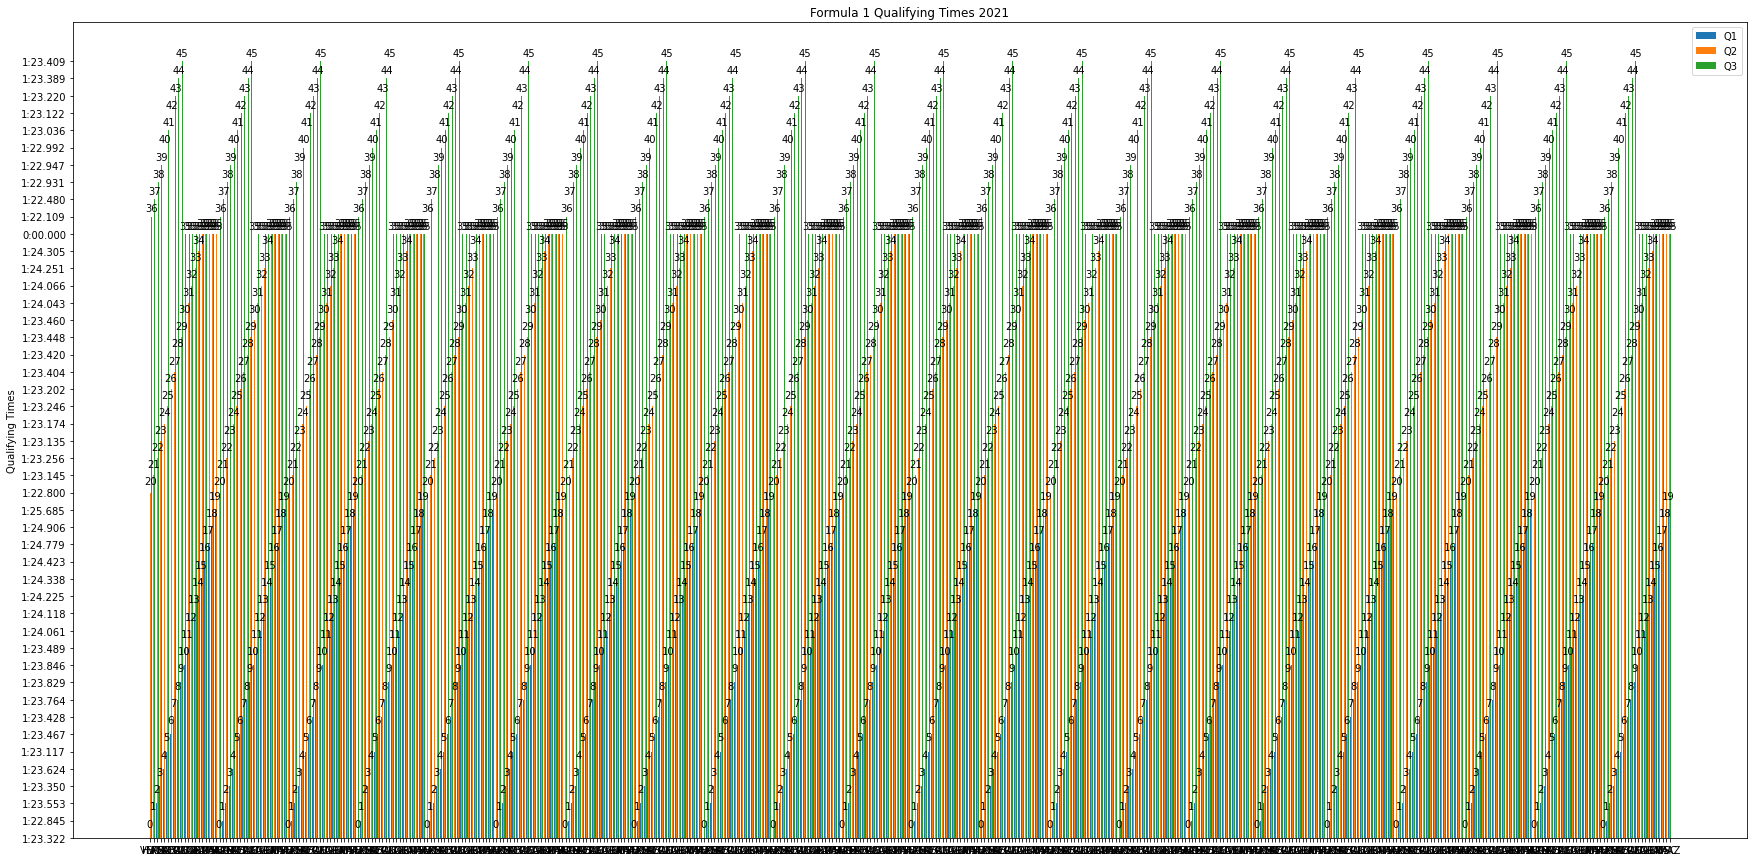

In [322]:

width = .25
x = 100
y = 95
z = 90

# qual_codes = ['VER', 'HAM', 'NOR', 'PER', 'SAI', 'BOT', 'LEC', 'TSU', 'OCO', 'RIC', 'ALO', 'GAS', 'STR', 'GIO', 'VET', 'LAT', 'RUS', 'RAI', 'MSC', 'MAZ']


# q1_times = [x+i for i in range(20)]
# q2_times = [y+i for i in range(20)]
# q3_times = [z+i for i in range(20)]

xlabel = np.arange(len(qual_codes))

fig, ax = plt.subplots()
fig.set_size_inches(30, 15)

ax.set_ylabel('Qualifying Times')
ax.set_title('Formula 1 Qualifying Times 2021')
ax.set_xticks(xlabel, qual_codes)


q1 = ax.bar(xlabel - width, q1_times, width, label='Q1')
q2 = ax.bar(xlabel, q2_times, width, label='Q2')
q3 = ax.bar(xlabel + width, q3_times, width, label='Q3')
# ax.bar(x + width/3, q2_times, width, label='Q3')


ax.bar_label(q1, padding=9)
ax.bar_label(q2, padding=6)
ax.bar_label(q3, padding=3)

ax.legend()

plt.show()
